# Proyecto Big Data Science

## Animal Shelter

In [1]:
# Carga de Librerias que vamos a utilizar
%matplotlib inline
import pyspark
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.ml.feature import OneHotEncoder, StringIndexer, Normalizer
from pyspark.ml.pipeline import Transformer
from pyspark.ml.param.shared import HasInputCol, HasOutputCol, Param
from pyspark import keyword_only
from pyspark.ml import Pipeline
from pyspark.sql import Row
from pyspark.sql import SQLContext
from pyspark.sql.types import IntegerType, LongType, StringType

In [2]:
sc = pyspark.SparkContext(master='local[*]')
sqlContext = SQLContext(sc)

In [3]:
pd.set_option('display.max_columns', 500)

In [4]:
#Se crea un dataframe de Pandas con el dataset del refugio
shelter_pd = pd.read_csv('train.csv')

In [5]:
shelter_pd

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan
5,A677334,Elsa,2014-04-25 13:04:00,Transfer,Partner,Dog,Intact Female,1 month,Cairn Terrier/Chihuahua Shorthair,Black/Tan
6,A699218,Jimmy,2015-03-28 13:11:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Tabby
7,A701489,NaN,2015-04-30 17:02:00,Transfer,Partner,Cat,Unknown,3 weeks,Domestic Shorthair Mix,Brown Tabby
8,A671784,Lucy,2014-02-04 17:17:00,Adoption,NaN,Dog,Spayed Female,5 months,American Pit Bull Terrier Mix,Red/White
9,A677747,NaN,2014-05-03 07:48:00,Adoption,Offsite,Dog,Spayed Female,1 year,Cairn Terrier,White


## Análisis de datos

En primer lugar es necesario analizar los datos. Por ello, se considera apropiado realizar el Data Quality Report.

In [6]:
shelter_pd.describe(include = "all")

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
count,26729,19038,26729,26729,13117,26729,26728,26711,26729,26729
unique,26729,6374,22918,5,16,2,5,44,1380,366
top,A705677,Max,2015-08-11 00:00:00,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,1,136,19,10769,7816,15595,9779,3969,8810,2824


## Limpiando la información

### <i>Name</i>

En primera instancia se analizará el atributo <i>Name</i>. Cada valor será reemplazado por un 1 en caso de que éste exista, y 0 en caso contrario (missing value). Contando con cierto conocimiento del dominio, se supone que el nombre del animal no debería influenciar su destino. Sin embargo, un indicador de presencia/ausencia de dicho valor, puede indicar de dónde provino el animal. Por ejemplo, si el perro fue entregado por una familia, probablemente tenga un nombre. Si, en cambio, provino de la calle, puede que el nombre no se sepa. La forma en la que llega el animal al refugio, puede llegar a influenciar su destino; y éste es el motivo por el cuál se decide incluir este indicador.

In [7]:
from pyspark.sql.functions import UserDefinedFunction
from pyspark.sql.types import IntegerType, LongType, BooleanType, DoubleType


class NameTransformer(Transformer, HasInputCol, HasOutputCol): 
    # Does binning using the module of the division
    @keyword_only
    def __init__(self, inputCol=None, outputCol=None):
        super(NameTransformer, self).__init__()
        kwargs = self.__init__._input_kwargs
        self.setParams(**kwargs)
        
    @keyword_only 
    def setParams(self, inputCol=None, outputCol=None):
        kwargs = self.setParams._input_kwargs
        return self._set(**kwargs)
        
    def _transform(self, dataset):
        in_col = dataset[self.getInputCol()]
        out_col = self.getOutputCol()
        udf = UserDefinedFunction(lambda x: category_func(x), IntegerType())
        return dataset.withColumn(out_col, udf(in_col))

def category_func(in_value):
    if (in_value):
        if in_value.lower() == 'nan':
            return 0
        else:
            return 1
    else:
        return 0

### <i>DateTime</i>

Para lidiar con las fechas, se considera apropiado separarla en tres features diferentes: día, mes, año. De esta manera, una feature continua como <i>DateTime</i> se convierte en tres categóricas. Se ignora la hora porque no se considera relevante para el caso de estudio.

In [8]:
class YearExtractor(Transformer, HasInputCol, HasOutputCol): 
    # Creates a column year
    @keyword_only
    def __init__(self, inputCol=None, outputCol=None):
        super(YearExtractor, self).__init__()
        kwargs = self.__init__._input_kwargs
        self.setParams(**kwargs)
        
    @keyword_only 
    def setParams(self, inputCol=None, outputCol=None):
        kwargs = self.setParams._input_kwargs
        return self._set(**kwargs)
        
    def _transform(self, dataset):
        in_col = dataset[self.getInputCol()]
        out_col = self.getOutputCol()
        udf = UserDefinedFunction(lambda x: isolateYear(x), StringType())
        return dataset.withColumn(out_col, udf(in_col))

class MonthExtractor(Transformer, HasInputCol, HasOutputCol): 
    # Creates a column month
    @keyword_only
    def __init__(self, inputCol=None, outputCol=None):
        super(MonthExtractor, self).__init__()
        kwargs = self.__init__._input_kwargs
        self.setParams(**kwargs)
        
    @keyword_only 
    def setParams(self, inputCol=None, outputCol=None):
        kwargs = self.setParams._input_kwargs
        return self._set(**kwargs)
        
    def _transform(self, dataset):
        in_col = dataset[self.getInputCol()]
        out_col = self.getOutputCol()
        udf = UserDefinedFunction(lambda x: isolateMonth(x), StringType())
        return dataset.withColumn(out_col, udf(in_col))

class DayExtractor(Transformer, HasInputCol, HasOutputCol): 
    # Creates a column day
    @keyword_only
    def __init__(self, inputCol=None, outputCol=None):
        super(DayExtractor, self).__init__()
        kwargs = self.__init__._input_kwargs
        self.setParams(**kwargs)
        
    @keyword_only 
    def setParams(self, inputCol=None, outputCol=None):
        kwargs = self.setParams._input_kwargs
        return self._set(**kwargs)
        
    def _transform(self, dataset):
        in_col = dataset[self.getInputCol()]
        out_col = self.getOutputCol()
        udf = UserDefinedFunction(lambda x: isolateDay(x), StringType())
        return dataset.withColumn(out_col, udf(in_col))

def isolateDay(in_value):
    return in_value.split()[0][8:]

def isolateMonth(in_value):
    return in_value.split()[0][5:7]

def isolateYear(in_value):
    return in_value.split()[0][:4]

### <i>OutcomeType</i>

Este es el target feature. Por lo tanto, es necesario verificar que no hay missing values y, en caso de haberlos, se deben eliminar dichas filas ya que no aportan ningún tipo de información. Sin embargo, como se puede apreciar del Data Quality Report detallado anteriormente, no hay missing values. <br>
Analizo que no haya ningún nivel dentro de la feature con nombre <i>unknown</i> o algo similar.

/opt/conda/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


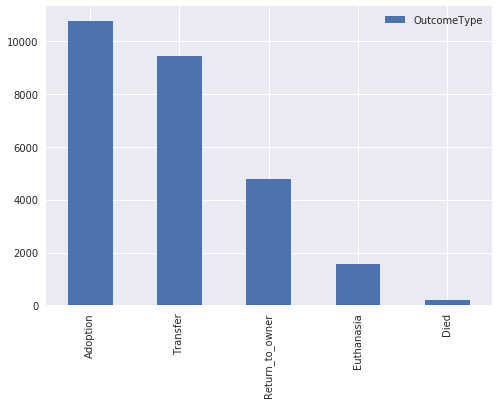

In [9]:
pd.DataFrame(shelter_pd.OutcomeType.value_counts()).plot(kind='bar')

Efectivamente, todas las filas parecen contener información de utilidad, por lo que no se necesita realizar limpieza alguna.

### <i>Animal type</i>

Se grafican las frecuencias para cada uno de los niveles del feature para detectar alguna anomalía en la información pero, como se puede ver, no la hay.

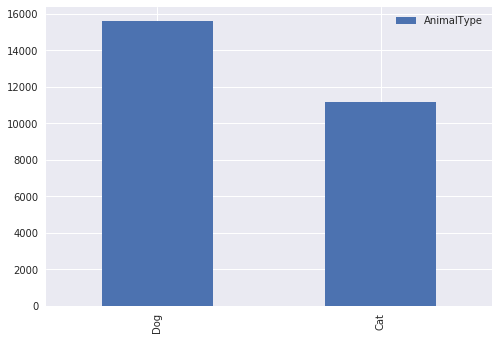

In [10]:
pd.DataFrame(shelter_pd.AnimalType.value_counts()).plot(kind='bar')

### <i>SexuponOutcome</i>

Como podemos ver en el Data Quality Report, hay un missing value. Sin embargo, se considera apropiado investigar qué niveles toma esta feature a partir de un gráfico de histograma.

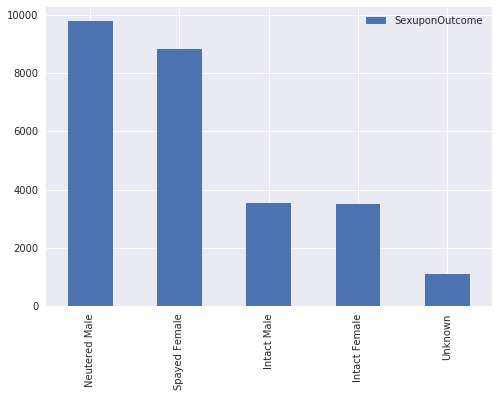

In [11]:
pd.DataFrame(shelter_pd.SexuponOutcome.value_counts()).plot(kind='bar')

Tanto el missing value, como los calificados como <i>unknown</i>, se les imputará un valor (ya que totalizan menos del 30% de los datos). Para ello necesito determinadas funciones genéricas como obtener la moda, contar la cantidad de veces que un valor aparece en una columna y demás.

In [12]:
import operator

def valueCountPandas(DF, column, value): 
    '''
        Function that counts the number of occurrences of a value in a given column
        First parameter is a pandas DataFrame
        Second parameter is the name of a column (String)
        Third parameter is the value that needs to be counted (String)
    '''
    count = 0
    columnIndex = DF.columns.get_loc(column)
    for (index, row) in DF.iterrows():
        if row[columnIndex] == value:
            count += 1
    return count

def valueCount(DF, column, value):
    '''
        Function that counts the number of occurrences of a value in a given column
        First parameter is a Spark DataFrame
        Second parameter is the name of a column (String)
        Third parameter is the value that needs to be counted (String)
    '''
    return DF.rdd.filter(lambda x: x[column] == value).count()

def missingValuesRemover(DF, column):
    '''
        Removes the rows with missing values in the given column
        First parameter is a pandas DataFrame
        Second parameter is the name of the column to be analyzed
    '''
    count = 0
    columnIndex = DF.columns.get_loc(column)
    for (index, row) in DF.iterrows():
        if str(row[columnIndex]).lower().split() == ['nan'] or str(row[columnIndex]).lower().split() == ['unknown']:
            DF = DF.drop(index)
            count += 1
    print(str(count) + " row(s) removed")
    return DF

def selectDistinctPandas(DF, column):
    '''
        Selects all distinct value from column
        First parameter is a pandas DataFrame
        Second parameter is the name of the column to select the values from
    '''
    distinctList = []
    columnIndex = DF.columns.get_loc(column)
    for (index, row) in DF.iterrows():
        if row[columnIndex] not in distinctList:
            distinctList.append(row[columnIndex])
    return distinctList

def selectDistinct(DF, column):
    '''
        Selects all distinct value from column
        First parameter is a Spark DataFrame
        Second parameter is the name of the column to select the values from
    '''
    return DF.rdd.map(lambda x: x[column]).distinct().collect()

def getMode(DF, column):
    '''
        Gets mode of a given column in the dataset
        First parameter is a pandas DataFrame
        Second parameter is the name of the column to get the mode from
    '''
    countDict = {}
    selectDistinctList = selectDistinct(DF, column)
    for i in selectDistinctList:
        countDict[i] = valueCount(DF, column, i)
    return sorted(countDict.items(), key=operator.itemgetter(1))[-1][0]

18 row(s) removed
1090 row(s) removed


In [13]:
#Transformer para llenar los missings values

class FillMissingValues(Transformer, HasInputCol, HasOutputCol): 
    # Creates a column day
    @keyword_only
    def __init__(self, inputCol=None, outputCol=None):
        super(FillMissingValues, self).__init__()
        kwargs = self.__init__._input_kwargs
        self.setParams(**kwargs)
        
    @keyword_only 
    def setParams(self, inputCol=None, outputCol=None):
        kwargs = self.setParams._input_kwargs
        return self._set(**kwargs)
        
    def _transform(self, dataset):
        in_col = dataset[self.getInputCol()]
        out_col = self.getOutputCol()
        modeAttribute = getMode(shelter_df, self.getInputCol())
        udf = UserDefinedFunction(lambda x: fillMissingValues(x, modeAttribute), StringType())
        return dataset.withColumn(out_col, udf(in_col))
    
def fillMissingValues(input_value, mode):
    if (input_value.lower() == 'nan' or input_value.lower() == 'unknown'):
        return mode
    else:
        return input_value

### <i>AgeuponOutcome</i>

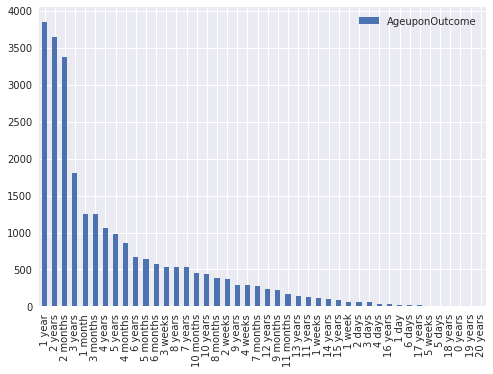

In [14]:
pd.DataFrame(shelter_pd['AgeuponOutcome'].value_counts()).plot(kind='bar')

Debido a la gran cantidad de features categóricas, se considera apropiado hacer binning dividiendo en ciertos límites.

In [15]:
#Transformer para categorizar la edad de los animales

class AgeuponOutcomeTransformer(Transformer, HasInputCol, HasOutputCol): 
    # Does binning using the module of the division
    @keyword_only
    def __init__(self, inputCol=None, outputCol=None):
        super(AgeuponOutcomeTransformer, self).__init__()
        kwargs = self.__init__._input_kwargs
        self.setParams(**kwargs)
        
    @keyword_only 
    def setParams(self, inputCol=None, outputCol=None):
        kwargs = self.setParams._input_kwargs
        return self._set(**kwargs)
        
    def _transform(self, dataset):
        in_col = dataset[self.getInputCol()]
        out_col = self.getOutputCol()
        udf = UserDefinedFunction(lambda x: binner_func(x), StringType())
        return dataset.withColumn(out_col, udf(in_col))

def binner_func(in_value):
    age_in_days = 0
    splited_value = in_value.split(' ')        
    if (splited_value[1] == 'years' or splited_value[1] == 'year'):
        age_in_days = int(splited_value[0])*365
    elif(splited_value[1] == 'months' or splited_value[1] == 'month'):
        age_in_days = int(splited_value[0])*30
    elif(splited_value[1] == 'weeks' or splited_value[1] == 'week'):
        age_in_days = int(splited_value[0])*7  
    elif(splited_value[1] == 'days' or splited_value[1] == 'day'):
        age_in_days = int(splited_value[0])
        
    if (age_in_days > 0 and age_in_days <= 365):
        return 'young'
    elif (age_in_days > 365 and age_in_days <= 365*3):
        return 'young_adult'
    elif (age_in_days > 365*3 and age_in_days <= 365*7):
        return 'adult'
    elif (age_in_days > 365*7 and age_in_days <= 365*10):
        return 'old_adult'
    elif (age_in_days > 365*10):
         return 'old'
    else:
        return 'young'

### <i>Breed</i>

La mayoría de los modelos no tiende a generalizar bien cuando las features categóricas cuentan con demasiados niveles. Por este motivo, se considera apropiado hacerle un tratamiento a los más de 1.300 niveles de la feature <i>Breed</i>. Se hará binning de estas categorías para contar con menos de ellas. Éste será de igual frecuencia, y se analizará la mejor opción en cuánto a cantidad de buckets.

In [16]:
def check_if_valid(value, list_of_existing_values):
    for i in range(0, len(list_of_existing_values)):
        if value != "" and list_of_existing_values[i] != None and value == list_of_existing_values[i]:
            return float(i)
    return float(len(list_of_existing_values))

In [17]:
class InvalidValuesTransformer(Transformer, HasInputCol, HasOutputCol): 
    # Does binning using the module of the division
    @keyword_only
    def __init__(self, inputCol=None, outputCol=None):
        super(InvalidValuesTransformer, self).__init__()
        kwargs = self.__init__._input_kwargs
        self.setParams(**kwargs)
        
    @keyword_only 
    def setParams(self, inputCol=None, outputCol=None):
        kwargs = self.setParams._input_kwargs
        return self._set(**kwargs)
        
    def _transform(self, dataset):
        in_col = dataset[self.getInputCol()]
        out_col = self.getOutputCol()
        listOfExistingValues = selectDistinct(shelter_df, self.getInputCol())
        udf = UserDefinedFunction(lambda x: invalid_values_function(x, listOfExistingValues), DoubleType())
        return dataset.withColumn(out_col, udf(in_col))

def invalid_values_function(in_value, listExistingValues):
    return check_if_valid(in_value, list(listExistingValues))

### <i>Color</i>

Esta feature se tratará de igual manera que <i>Breed</i> ya que cuenta con muchos niveles. 

## Transformers y Pipelines

Se hace la limpieza de datos con la ayuda de <i>Pipelines</i>, y se escriben todos los Transformers a continuación.

In [19]:
# Custom transformers
Name_transformer = NameTransformer(inputCol='Name', outputCol='Name')
DateTime_YearExtractor = YearExtractor(inputCol='DateTime', outputCol='Year')
DateTime_MonthExtractor = MonthExtractor(inputCol='DateTime', outputCol='Month')
DateTime_DayExtractor = DayExtractor(inputCol='DateTime', outputCol='Day')
SexuponOutcome_transformer = FillMissingValues(inputCol='SexuponOutcome', outputCol='SexuponOutcome')
AgeuponOutcome_fillMissingValues = FillMissingValues(inputCol='AgeuponOutcome', outputCol='AgeuponOutcome')
AgeuponOutcome_transformer = AgeuponOutcomeTransformer(inputCol='AgeuponOutcome', outputCol='AgeuponOutcome')
Breed_transformer = InvalidValuesTransformer(inputCol='Breed', outputCol='Breed')
Color_transformer = InvalidValuesTransformer(inputCol='Color', outputCol='Color')

# String indexers 
OutcomeType_indexer = StringIndexer(inputCol="OutcomeType", outputCol="label")
AnimalType_indexer = StringIndexer(inputCol="AnimalType", outputCol="AnimalType_idx")
SexuponOutcome_indexer = StringIndexer(inputCol="SexuponOutcome", outputCol="SexuponOutcome_idx")
Age_indexer = StringIndexer(inputCol="AgeuponOutcome", outputCol="AgeuponOutcome_idx")
DateTime_Year_indexer = StringIndexer(inputCol="Year", outputCol="Year_idx")
DateTime_Month_indexer = StringIndexer(inputCol="Month", outputCol="Month_idx")
DateTime_Day_indexer = StringIndexer(inputCol="Day", outputCol="Day_idx")

# Equal-frequency binning
from pyspark.ml.feature import QuantileDiscretizer

Breed_binning_transformer = QuantileDiscretizer(inputCol="Breed", outputCol="Breed_result", numBuckets=14, handleInvalid="keep")
Color_binning_transformer = QuantileDiscretizer(inputCol="Color", outputCol="Color_result", numBuckets=10, handleInvalid="keep")

# OneHotEncoder
encoder_breed = OneHotEncoder(inputCol="Breed_result", outputCol="Breed_Vec")
encoder_color = OneHotEncoder(inputCol="Color_result", outputCol="Color_Vec")
encoder_age = OneHotEncoder(inputCol="AgeuponOutcome_idx", outputCol="AgeuponOutcome_Vec")
encoder_sex = OneHotEncoder(inputCol="SexuponOutcome_idx", outputCol="SexuponOutcome_Vec")

# Vector assembler
from pyspark.ml.feature import VectorAssembler

Vector_transformer = VectorAssembler(inputCols=['Name', 'AnimalType_idx', 
                                                'SexuponOutcome_Vec', 'AgeuponOutcome_Vec',
                                                'Year_idx', 'Month_idx', 'Day_idx', 'Color_Vec', 'Breed_Vec'], 
                                     outputCol="features")

In [51]:
#Se crean los stages para la pipeline

stages=[Name_transformer, DateTime_DayExtractor, DateTime_MonthExtractor, DateTime_YearExtractor, 
        SexuponOutcome_transformer, AgeuponOutcome_fillMissingValues, AgeuponOutcome_transformer, 
        Breed_transformer, Breed_binning_transformer, encoder_breed, OutcomeType_indexer, AnimalType_indexer, SexuponOutcome_indexer,
        encoder_sex, Color_transformer, Color_binning_transformer, encoder_color, Age_indexer, encoder_age, DateTime_Year_indexer, 
        DateTime_Month_indexer, DateTime_Day_indexer, Vector_transformer]

#Se pasa el dataframe de pandas a spark
shelter_pd = shelter_pd[['Name', 'DateTime', 'OutcomeType', 'AnimalType', 'SexuponOutcome', 'AgeuponOutcome', 'Breed', 'Color']].astype(str)
shelter_df = sqlContext.createDataFrame(shelter_pd)

# Model Trainings

Creo los datasets de entrenamiento y testeo de Kaggle

In [21]:
training = shelter_df
testing_pd = pd.read_csv('test.csv')
testing_pd = testing_pd[['ID','Name','DateTime','AnimalType','SexuponOutcome','AgeuponOutcome','Breed','Color']].astype(str)
testing = sqlContext.createDataFrame(testing_pd)

Se generan dos dataframes para entrenar y evaluar nuestro modelo, antes de correrlo con el dataset de testing

In [22]:
(trainingData, testData) = training.randomSplit([0.8, 0.2], seed = 100)

# Decision trees

Se declara el <i>decision tree</i> con una máxima profundidad de 3, y usando el índice de Gini.

In [23]:
from pyspark.ml.classification import DecisionTreeClassifier

dt = DecisionTreeClassifier(impurity="gini", labelCol="label", featuresCol="features", maxDepth=5)

Se agrega el Decision Tree a la variable stages para producir un nuevo array de stages.

In [24]:
stages_with_decision_tree = stages + [dt]

Se crea el <i>Pipeline</i> con las stages declaradas anteriormente. Se hace un fit para entrenar el modelo y, una vez que se crea, se predice sobre el dataset de testeo.

In [25]:
pipeline = Pipeline(stages=stages_with_decision_tree)
model = pipeline.fit(trainingData)
predictions = model.transform(testData)

Se Evalua

In [26]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedPrecision")
accuracy = evaluator.evaluate(predictions)
print "Model Accuracy: ", accuracy

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedRecall")
recall = evaluator.evaluate(predictions)
print "Model Recall: ", recall

Model Accuracy:  0.608267829063
Model Recall:  0.603032659409


Se genera otro modelo con con el Training dataset y luego testea con el testing Dataset de Kaggle

In [27]:
model = pipeline.fit(training)
result_df = model.transform(testing).select("ID", "prediction", "probability")

Se genera el csv para enviar a Kaggle

In [28]:
result_pd = result_df.toPandas()[["ID", "probability"]]
result_pd.to_csv("decision_tree.csv") #, header=["Adoption", "Died", "Euthanasia", "Return_to_owner", "Transfer"])
f = open('decision_tree.csv','r')
fo = open('decision_tree_out.csv','w')

first = True
# go through each line of the file
for line in f:
    if first:
        fo.write("ID,Adoption,Died,Euthanasia,Return_to_owner,Transfer\n")
        first = False
    else:
        bits = line.split(',')
        # change second column
        # join it back together and write it out
        bits[2] = bits[2][2:]
        if bits[6][-3] == ']':
            bits[6] = bits[6][:-3]
        else:
            bits[6] = bits[6][:-2]
        fo.write(''.join(bits[1]+','+bits[2]+','+bits[3]+','+bits[4]+','+bits[5]+','+bits[6]) )
        fo.write('\n')
        
f.close()
fo.close()

print 'DONE!'

DONE!


## Random Forest

In [29]:
from pyspark.ml.classification import RandomForestClassifier

Se declara el random forest un numero maximo de n arboles.

In [30]:
rf = RandomForestClassifier(impurity="gini", labelCol="label", featuresCol="features", numTrees=100)

Se agrega el Naive Bayes a la variable stages para producir un nuevo array de stages.

In [31]:
stages_with_random_forest = stages + [rf]

Se crea el Pipeline con las stages declaradas anteriormente. Se hace un fit para entrenar el modelo y, una vez que se crea, se predice sobre el dataset de testeo.

In [32]:
pipeline = Pipeline(stages=stages_with_random_forest)
model = pipeline.fit(trainingData)
predictions = model.transform(testData)

In [33]:
#predictions.show()

In [34]:
predictions.select("label", "prediction", "probability").show()

+-----+----------+--------------------+
|label|prediction|         probability|
+-----+----------+--------------------+
|  0.0|       0.0|[0.45861972403196...|
|  0.0|       0.0|[0.63948460484946...|
|  0.0|       0.0|[0.60965644608830...|
|  1.0|       0.0|[0.43573412318102...|
|  0.0|       0.0|[0.60809480939699...|
|  0.0|       0.0|[0.64331060977175...|
|  0.0|       2.0|[0.33130890463554...|
|  0.0|       0.0|[0.68200462572631...|
|  0.0|       0.0|[0.36945899963346...|
|  0.0|       0.0|[0.56598784712712...|
|  0.0|       0.0|[0.63897457641916...|
|  1.0|       0.0|[0.43666999979705...|
|  0.0|       0.0|[0.58434856983068...|
|  2.0|       0.0|[0.61923092139891...|
|  0.0|       0.0|[0.44261785326892...|
|  0.0|       0.0|[0.52508890775497...|
|  0.0|       0.0|[0.58623348176516...|
|  0.0|       0.0|[0.63451811221443...|
|  2.0|       2.0|[0.35139836430743...|
|  1.0|       2.0|[0.30541888950721...|
+-----+----------+--------------------+
only showing top 20 rows



Se evalua el modelo

In [35]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedPrecision")
accuracy = evaluator.evaluate(predictions)
print "Model Accuracy: ", accuracy

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedRecall")
recall = evaluator.evaluate(predictions)
print "Model Recall: ", recall

Model Accuracy:  0.63102991225
Model Recall:  0.602838258165


Se genera otro modelo con con el Training dataset y luego testea con el testing Dataset de Kaggle

In [36]:
model = pipeline.fit(training)
result_df = model.transform(testing).select("ID", "prediction", "probability")

Se genera el csv para enviar a Kaggle

In [37]:
result_pd = result_df.toPandas()[["ID", "probability"]]
result_pd.to_csv("random_forest.csv") #, header=["Adoption", "Died", "Euthanasia", "Return_to_owner", "Transfer"])
f = open('random_forest.csv','r')
fo = open('random_forest_out.csv','w')

first = True
# go through each line of the file
for line in f:
    if first:
        fo.write("ID,Adoption,Died,Euthanasia,Return_to_owner,Transfer\n")
        first = False
    else:
        bits = line.split(',')
        # change second column
        # join it back together and write it out
        bits[2] = bits[2][2:]
        if bits[6][-3] == ']':
            bits[6] = bits[6][:-3]
        else:
            bits[6] = bits[6][:-2]
        fo.write(''.join(bits[1]+','+bits[2]+','+bits[3]+','+bits[4]+','+bits[5]+','+bits[6]) )
        fo.write('\n')
        
f.close()
fo.close()

print 'DONE!'

DONE!


# Naive Bayes

In [38]:
from pyspark.ml.classification import NaiveBayes

nb = NaiveBayes(smoothing=5.0, modelType="multinomial", labelCol="label")

Se agrega el Naive Bayes a la variable stages para producir un nuevo array de stages.

In [39]:
stages_with_naive_bayes = stages + [nb]

Se crea el Pipeline con las stages declaradas anteriormente. Se hace un fit para entrenar el modelo y, una vez que se crea, se predice sobre el dataset de testeo.

In [40]:
pipeline = Pipeline(stages=stages_with_naive_bayes)
model = pipeline.fit(trainingData)
predictions = model.transform(testData)

In [41]:
predictions.select("label", "prediction", "probability").show()

+-----+----------+--------------------+
|label|prediction|         probability|
+-----+----------+--------------------+
|  0.0|       0.0|[0.52829371634792...|
|  0.0|       0.0|[0.68591943178120...|
|  0.0|       0.0|[0.70715412531852...|
|  1.0|       2.0|[0.42916471335861...|
|  0.0|       0.0|[0.59756702004741...|
|  0.0|       0.0|[0.58850583454383...|
|  0.0|       2.0|[0.31616205365026...|
|  0.0|       0.0|[0.63023231545350...|
|  0.0|       1.0|[0.40200788231336...|
|  0.0|       0.0|[0.66010095212738...|
|  0.0|       0.0|[0.67645992481471...|
|  1.0|       0.0|[0.43820884925196...|
|  0.0|       0.0|[0.55116643695395...|
|  2.0|       0.0|[0.61489509248627...|
|  0.0|       0.0|[0.50479742241530...|
|  0.0|       0.0|[0.59136558606850...|
|  0.0|       0.0|[0.46480085761234...|
|  0.0|       0.0|[0.54739628091894...|
|  2.0|       2.0|[0.20408106414145...|
|  1.0|       2.0|[0.36454328340884...|
+-----+----------+--------------------+
only showing top 20 rows



Evaluamos nuestro modelo

In [50]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedPrecision")
accuracy = evaluator.evaluate(predictions)
print "Model Accuracy: ", accuracy

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedRecall")
recall = evaluator.evaluate(predictions)
print "Model Recall: ", recall

Model Accuracy:  0.575192025415
Model Recall:  0.5783437014


Se realiza la Confusion Matrix

In [43]:
from pyspark.mllib.evaluation import MulticlassMetrics
# Create (prediction, label) pairs
predictionAndLabel = predictions.select("prediction", "label").rdd

# Generate confusion matrix
metrics = MulticlassMetrics(predictionAndLabel)
print metrics.confusionMatrix()

DenseMatrix([[  1.64500000e+03,   1.00000000e+02,   4.21000000e+02,
                0.00000000e+00,   0.00000000e+00],
             [  6.13000000e+02,   8.20000000e+02,   2.50000000e+02,
                2.00000000e+00,   0.00000000e+00],
             [  4.02000000e+02,   6.00000000e+01,   5.09000000e+02,
                2.00000000e+00,   0.00000000e+00],
             [  6.70000000e+01,   1.46000000e+02,   7.30000000e+01,
                1.00000000e+00,   0.00000000e+00],
             [  8.00000000e+00,   2.10000000e+01,   4.00000000e+00,
                0.00000000e+00,   0.00000000e+00]])


Ahora utilizamos diferentes valores de smoothing para evaluar cual modelo tiene mejor accuracy

In [44]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Create ParamGrid and Evaluator for Cross Validation
paramGrid = ParamGridBuilder().addGrid(nb.smoothing, [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]).build()
cvEvaluator = MulticlassClassificationEvaluator()


In [45]:
# Run Cross-validation
cv = CrossValidator(estimator=pipeline, estimatorParamMaps=paramGrid, evaluator=cvEvaluator)
cvModel = cv.fit(trainingData)

In [46]:
# Make predictions on testData. cvModel uses the bestModel.
cvPredictions = cvModel.transform(testData)

In [47]:
# Evaluate bestModel found from Cross Validation
evaluator.evaluate(cvPredictions)

0.5595474825773766

Se genera otro modelo con con el Training dataset y luego testea con el testing Dataset de Kaggle

In [48]:
model = pipeline.fit(training)
result_df = model.transform(testing).select("ID", "prediction", "probability")

Se genera el csv para enviar a Kaggle

In [52]:
result_pd = result_df.toPandas()[["ID", "probability"]]
result_pd.to_csv("naive.csv") 
f = open('naive.csv','r')
fo = open('naive_out.csv','w')

first = True
# go through each line of the file
for line in f:
    if first:
        fo.write("ID,Adoption,Died,Euthanasia,Return_to_owner,Transfer\n")
        first = False
    else:
        bits = line.split(',')
        # change second column
        # join it back together and write it out
        bits[2] = bits[2][2:]
        bits[6] = bits[6][:-3]
        fo.write(''.join(bits[1]+','+bits[2]+','+bits[3]+','+bits[4]+','+bits[5]+','+bits[6]) )
        fo.write('\n')
        
f.close()
fo.close()

print 'DONE!'

DONE!


Para finalizar se mostraran implementaciones de Algoritmos que fueron implementados por nosotros, pero que tenian una demora muy grande en arrojar resultados

## KNN

In [ ]:
import operator

def jaccardSimilarity(row1, row2):
    similarity = 0
    for i in range (len(row1)):
        #print(row1[i])
        #print(row2[i])
        if row1[i] == row2[i]:
            similarity += 1
    return float(similarity)/len(row1)

def getNeighbours(k, query, dataset):     ## Returns a list of the k nearest neighbour(s) of the query
    datasetWithoutTarget = dataset.drop("OutcomeType", 1)
    datasetWithoutTarget = datasetWithoutTarget.reset_index(drop=True)
    dictDistance = {}
    for i in range(len(datasetWithoutTarget)):
        dictDistance[i] = jaccardSimilarity(query, datasetWithoutTarget.ix[i])
    sorted_dictDistance = sorted(dictDistance.items(), key=operator.itemgetter(1))
    k_sorted_dictDistance = []
    for i in sorted_dictDistance[-k:]:
        k_sorted_dictDistance.append(i[0])
    return k_sorted_dictDistance


def KNN(neighbours, dataset):
    dictOutcome = {}
    for i in neighbours:
        if dataset.ix[i][0] in dictOutcome:
            dictOutcome[dataset.ix[i][0]] += 1
        else:
            dictOutcome[dataset.ix[i][0]] = 1
    sortedOutcomes = sorted(dictOutcome.iteritems(), key=operator.itemgetter(1), reverse=True)
    return sortedOutcomes[0][0]

## PS: Here, everything takes as an argument the dataset WITH the target feature
## The dataset must have the target feature (OutcomeType) as first column
## To make a KNN prediction for a query given a dataset --> KNN(getNeighbours(k, query, dataset), dataset)

In [ ]:
iasf = testing.toPandas()
for i in range(0, len(iasf)):
    print(KNN(getNeighbours(10, iasf.ix[i], shelter_cleaned_df), shelter_cleaned_df))

## Naive Bayes

In [53]:
class NaiveBayes:
    def __init__(self, dataframe, target_feature):       
        self.dataframe = dataframe
        self.target_feature  = target_feature
    
    def naive_bayes_probabilities(self):        
        df = self.dataframe.copy()
        df['count'] = [1] * len(df.index)
        target_feature = self.target_feature
        aux_probabilities = []
        for column in df.columns:
            if column not in [target_feature, 'count']: 
                counts = df.pivot_table(index=target_feature, columns=column, aggfunc=len, margins=True, values='count')
                percent = counts.div(counts.iloc[:,-1], axis=0)
                percent = percent.drop('All', 1)
                aux_probabilities.extend([percent])
        aux_probabilities.extend([df.groupby(self.target_feature).agg({'count':sum}).div(len(df.index))])        
        probabilities = aux_probabilities[0].join(aux_probabilities[1:])
        probabilities = probabilities.fillna(0)
        probabilities = probabilities.drop(probabilities.index[-1])
        self.probabilities = probabilities
        return probabilities
    
    def naive_bayes_smoothed_probabilities(self, k):
        df = self.dataframe.copy()
        df['count'] = [1] * len(df.index)
        target_feature = self.target_feature
        aux_probabilities = []
        for column in df.columns:
            if column not in [target_feature, 'count']: 
                counts = df.pivot_table(index=target_feature, columns=column, aggfunc=len, margins=True, values='count')
                counts = counts.fillna(0)
                categories = list(counts.columns)
                features = list(counts.index)
                del features[-1]
                domain = len(categories) - 1
                percent = self.smooth(features, categories, counts, domain, k)
                percent = percent.drop('All', 1)
                aux_probabilities.extend([percent])
        aux_probabilities.extend([df.groupby(target_feature).agg({'count':sum}).div(len(df.index))])
        probabilities = aux_probabilities[0].join(aux_probabilities[1:])
        probabilities = probabilities.drop(probabilities.index[-1])
        self.probabilities = probabilities
        return probabilities
    
    def predict(self, instance):
        predictions = {}
        outputs = self.dataframe[self.target_feature].unique()
        for output in outputs:
            predictions[output] = self.target_probability(instance,output)
        return predictions
    
    def target_probability(self, instance, target):
        target_count = self.dataframe[(self.dataframe[self.target_feature] == target)].count()[0]
        instance_probabilities = []
        for feature in instance:
            probability = self.probabilities[feature][target]
            instance_probabilities.append(probability)
        multiplication = reduce(lambda x, y: x*y, instance_probabilities)
        multiplication = multiplication * target_count
        count = self.dataframe.count()[0]
        probability = multiplication/float(count)
        return probability
    
    def smooth_probability(self, count_bayes, count_feature, domain, k):
        result = (count_bayes + k) / (count_feature + (k * domain))
        return result
    
    def smooth(self, features, categories, df, domain ,k):
        for i in range(0,len(features)):
            for j in range(0,len(categories)-1):
                count_bayes = df.iloc[i,j]
                count_feature = df.iloc[i,-1]
                smoothed_probability = self.smooth_probability(count_bayes, count_feature, domain, k)
                df.iloc[i,j] = smoothed_probability
        return df
    
    def run(self, dataframe):
        def do_prediction(x):
            instance = list(x)
            del instance[0]
            del instance[-1]
            predictions = self.predict(instance)
            prediction = max(predictions.iteritems(), key=operator.itemgetter(1))[0]
            return prediction
        dataframe['Prediction'] = dataframe.apply(do_prediction, axis=1)
        return dataframe